In [1]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential, Model

import os
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
# Creating input images and labels
image_path = 'images'
target_size = (64, 64)
images = os.listdir(image_path)
X = np.zeros((len(images), *target_size, 3))
Y = np.zeros(len(images))
for idx, image in enumerate(images):
    # load image
    img = load_img(image_path+'/'+image, target_size=target_size)
    # convert as array
    img = img_to_array(img)
    X[idx] = img
    if 'ball' in image:
        Y[idx] = 1
    else:
        Y[idx] = 0

In [3]:
# Normalising
X /= 255

In [4]:
# Model
model = Sequential([
                    Conv2D(64, (3, 3), input_shape=(*target_size, 3), activation='relu', name="CNN1"),
                    MaxPooling2D(2,2, name="MAXPOOL1"),
                    Conv2D(64, (3, 3), activation='relu', name="CNN2"),
                    MaxPooling2D(2, 2, name="MAXPOOL2"),
                    Flatten(),
                    Dense(128, activation="relu", name="DENSE"),
                    Dense(1, activation="sigmoid", name="output")
])
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

W0810 13:25:34.920004 39620 deprecation_wrapper.py:119] From C:\Users\Vignesh.Kumar2\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 13:25:34.961438 39620 deprecation_wrapper.py:119] From C:\Users\Vignesh.Kumar2\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 13:25:34.968411 39620 deprecation_wrapper.py:119] From C:\Users\Vignesh.Kumar2\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 13:25:35.014836 39620 deprecation_wrapper.py:119] From C:\Users\Vignesh.Kumar2\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool 

In [5]:
# Train model
model.fit(X, Y, epochs=12)

W0810 13:25:35.587916 39620 deprecation_wrapper.py:119] From C:\Users\Vignesh.Kumar2\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/12
10/10 [==============================] - 1s 66ms/step - loss: 0.6870 - acc: 0.5000
Epoch 2/12
10/10 [==============================] - 0s 11ms/step - loss: 0.6712 - acc: 0.5000
Epoch 3/12
10/10 [==============================] - 0s 12ms/step - loss: 0.6576 - acc: 0.5000
Epoch 4/12
10/10 [==============================] - 0s 11ms/step - loss: 0.6457 - acc: 0.7000
Epoch 5/12
10/10 [==============================] - 0s 10ms/step - loss: 0.6352 - acc: 0.7000
Epoch 6/12
10/10 [==============================] - 0s 12ms/step - loss: 0.6253 - acc: 0.7000
Epoch 7/12
10/10 [==============================] - 0s 10ms/step - loss: 0.6154 - acc: 0.7000
Epoch 8/12
10/10 [==============================] - 0s 10ms/step - loss: 0.6053 - acc: 0.7000
Epoch 9/12
10/10 [==============================] - 0s 10ms/step - loss: 0.5956 - acc: 0.7000
Epoch 10/12
10/10 [==============================] - 0s 10ms/step - loss: 0.5859 - acc: 0.7000
Epoch 11/12
10/10 [==============================] - 0s 10m

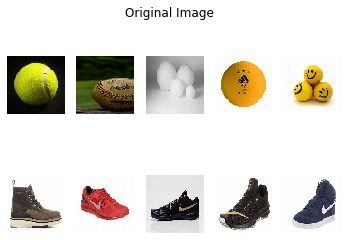

In [6]:
# def original_image():
fig, axarr = plt.subplots(2, 5)
fig.suptitle("Original Image")
idx = 0
for rid, row in enumerate(axarr):
    for cid, _ in enumerate(row):
        axarr[rid, cid].imshow(X[idx])
        axarr[rid, cid].axis('off')
        idx += 1

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CNN1 (Conv2D)                (None, 62, 62, 64)        1792      
_________________________________________________________________
MAXPOOL1 (MaxPooling2D)      (None, 31, 31, 64)        0         
_________________________________________________________________
CNN2 (Conv2D)                (None, 29, 29, 64)        36928     
_________________________________________________________________
MAXPOOL2 (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
DENSE (Dense)                (None, 128)               1605760   
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total para

In [8]:
# Extracting weights
weights = model.get_weights()
# Extracting layers from model
layers_list = [ layer.output for layer in model.layers ]
# Creating model with all hidden layer as output layer
trained_model = Model(inputs=model.input, outputs=layers_list)

In [9]:
def filter_image(filter_number):
        plt.title(f"Conv1, filter: {filter_number}")
        plt.imshow(weights[0][:, :, :, filter_number])

In [10]:
def hidden_image(filter_number):
    fig, axarr = plt.subplots(len(X), 1+len(layers_list)-3, figsize=(14, 14))
    fig.suptitle(f"CHANNELS / DIMENSION: {filter_number}", fontsize=16)
    
    # Convolved images
    for image_idx in range(0, len(X)):
        for layer_idx in range(0, 1+len(layers_list)-3):
            if layer_idx != 0:
                layer = trained_model.predict(X[image_idx].reshape(1, *target_size, 3))[layer_idx-1]
                axarr[image_idx, layer_idx].imshow(layer[0, :, :, filter_number], cmap="hot", interpolation='nearest')
            else: 
                axarr[image_idx, layer_idx].imshow(X[image_idx], cmap="hot", interpolation='nearest')
            axarr[image_idx, layer_idx].set_yticklabels([])
            axarr[image_idx, layer_idx].set_xticklabels([])
            axarr[image_idx, layer_idx].grid(False)
    #         axarr[image_idx, x].axis('off')
            if image_idx == 0 and layer_idx == 0:
                axarr[image_idx, layer_idx].set_xlabel('ORIGNAL')
                axarr[image_idx, layer_idx].xaxis.tick_top()
                axarr[image_idx, layer_idx].xaxis.set_label_position('top') 
            if image_idx == 0 and layer_idx == 1:
                axarr[image_idx, layer_idx].set_xlabel('CONV 1')
                axarr[image_idx, layer_idx].xaxis.tick_top()
                axarr[image_idx, layer_idx].xaxis.set_label_position('top') 
            elif image_idx == 0 and layer_idx == 2:
                axarr[image_idx, layer_idx].set_xlabel('MAX POOL 1')
                axarr[image_idx, layer_idx].xaxis.tick_top()
                axarr[image_idx, layer_idx].xaxis.set_label_position('top') 
            elif image_idx == 0 and layer_idx == 3:
                axarr[image_idx, layer_idx].set_xlabel('CONV 2')
                axarr[image_idx, layer_idx].xaxis.tick_top()
                axarr[image_idx, layer_idx].xaxis.set_label_position('top') 
            elif image_idx == 0 and layer_idx == 4:
                axarr[image_idx, layer_idx].set_xlabel('MAX POOL 2')
                axarr[image_idx, layer_idx].xaxis.tick_top()
                axarr[image_idx, layer_idx].xaxis.set_label_position('top') 
            
    # plt.tight_layout()
    # fig.savefig('conv2.png')

## Convolved and MaxPooled images

### Filter image in 1st convolution layer

W0810 13:25:38.405251 39620 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


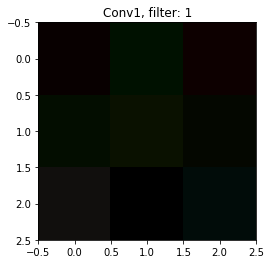

In [11]:
# 1st filter image
filter_image(filter_number=1)

W0810 13:25:38.976048 39620 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


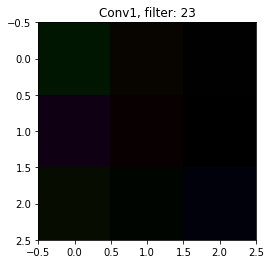

In [12]:
# 23 filter image
filter_image(filter_number=23)

### How the original image look like after passing through the convolution and max pooling layer 

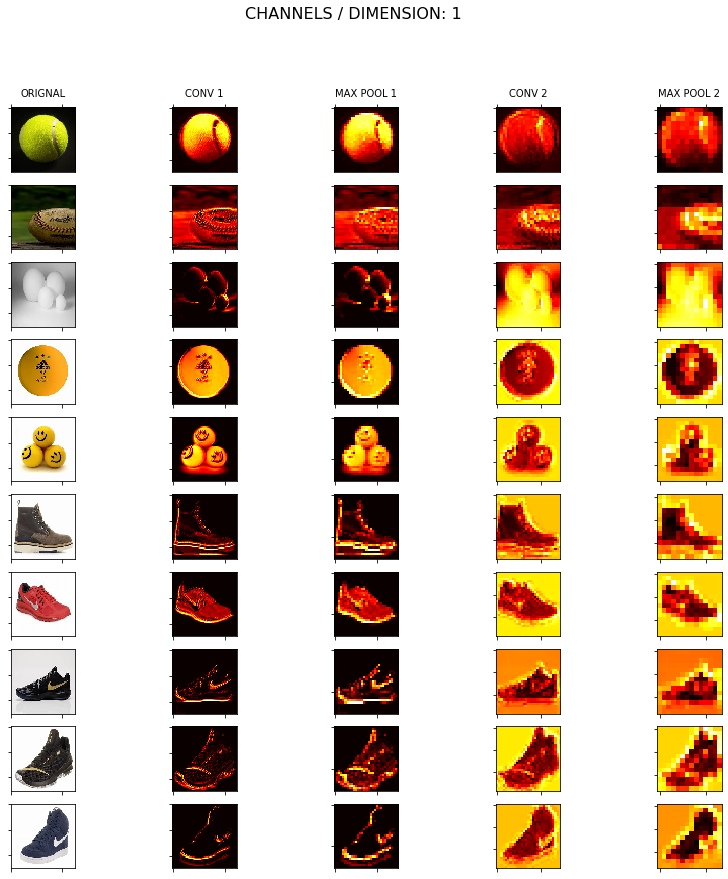

In [13]:
# image convolved with filter1
hidden_image(filter_number=1)

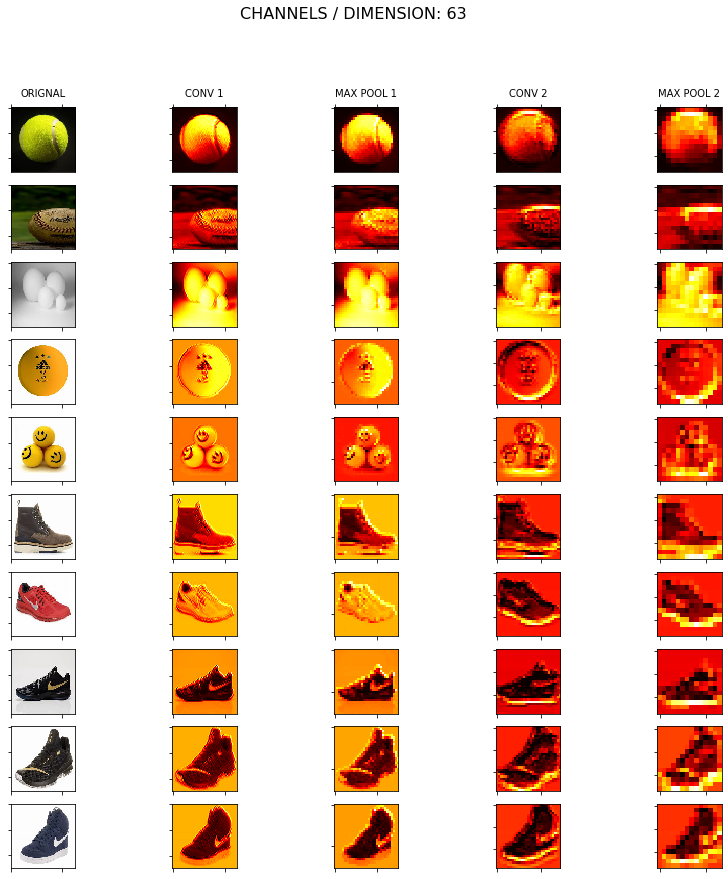

In [14]:
# image convolved with filter1
hidden_image(filter_number=63)